# 

# Plotting an overall ROC curve

In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score

### Importing saved results

In [77]:
# Initializing DF to store results
res = []

# Looping through all files
print('Files that were found:')
data_file_folder = 'data/results'
for root, dirs, files in os.walk(os.path.join('..' , data_file_folder)):
    for filename in files:
        print(' - ', filename)
        df = pd.read_csv(os.path.join('..' , data_file_folder, filename), sep=',')
        res.append(df)

Files that were found:
 -  Naïve Bayes.csv
 -  Logistic Regression.csv


### Plotting the ROC curve

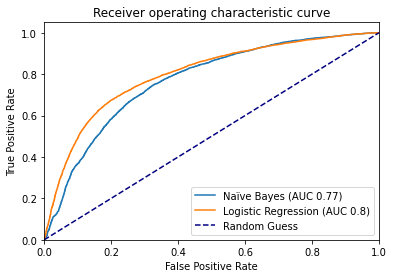

In [67]:
plt.figure()
for df in res:
# Compute micro-average ROC curve and ROC area
    fpr, tpr, _ = roc_curve(df.iloc[:,0], df.iloc[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} (AUC: {})'.format(df.columns[1], round(roc_auc, 2)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')
lw = 2
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc='lower right')
plt.show()
print()

# compute and print roc_score
#roc_score  = roc_auc_score(df['y_test'], df['Logistic Regression'])
#print('ROC Score:')
#print(roc_score)

In [82]:
def predict(percent=0.5):
    return random.randrange(0, 1) > percent

In [73]:
# compute and print Accuracy 
for i in res:
    df = res[i]
    calc_accuracy_score = accuracy_score(df.iloc[:,0], df.iloc[:,1].apply)
    print('Accuracy Score:')
    print(calc_accuracy_score)
    print()

TypeError: list indices must be integers or slices, not DataFrame

In [74]:
df = res[0].iloc[:,0]
#df.iloc[:,0]

In [75]:
df

0        False
1         True
2        False
3        False
4        False
         ...  
13708    False
13709    False
13710    False
13711     True
13712    False
Name: y_test, Length: 13713, dtype: bool

In [83]:
df.iloc[:,1].apply(lambda x: predict(x))

NameError: name 'random' is not defined

In [80]:
df.iloc[:,1]

0        0.189555
1        0.844950
2        0.252937
3        0.098028
4        0.843615
           ...   
20564    0.255146
20565    0.346925
20566    0.751955
20567    0.727855
20568    0.913088
Name: Logistic Regression, Length: 20569, dtype: float64